In [34]:
INPUT_DIR = '/kaggle/input/anime-recommendation-database-2020'
!ls {INPUT_DIR}

 anime.csv		   animelist.csv   rating_complete.csv
 anime_with_synopsis.csv  'html folder'    watching_status.csv


In [35]:
import numpy as np
import pandas as pd

In [36]:
rating_df = pd.read_csv(INPUT_DIR + '/rating_complete.csv', 
                        low_memory=False, 
                        usecols=["user_id", "anime_id", "rating"]
                        )
rating_df.head(4)

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7


In [37]:
# User should rate atleast 400 animies
n_ratings = rating_df['user_id'].value_counts()
rating_df = rating_df[rating_df['user_id'].isin(n_ratings[n_ratings >= 400].index)].copy()
len(rating_df)

24573682

In [38]:
# Scaling BTW (0 , 1.0)
min_rating = min(rating_df['rating'])
max_rating = max(rating_df['rating'])
rating_df['rating'] = rating_df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values.astype(np.float64)

AvgRating = np.mean(rating_df['rating'])
print('Avg', AvgRating)

Avg 0.6908262714196066


In [39]:
# Removing Duplicated Rows
duplicates = rating_df.duplicated()

if duplicates.sum() > 0:
    print('> {} duplicates'.format(duplicates.sum()))
    rating_df = rating_df[~duplicates]

print('> {} duplicates'.format(rating_df.duplicated().sum()))

> 0 duplicates


In [40]:
#identify the top users and top animes based on the number of ratings
g = rating_df.groupby('user_id')['rating'].count()
top_users = g.dropna().sort_values(ascending=False)[:20]
top_r = rating_df.join(top_users, rsuffix='_r', how='inner', on='user_id')

g = rating_df.groupby('anime_id')['rating'].count()
top_animes = g.dropna().sort_values(ascending=False)[:20]
top_r = top_r.join(top_animes, rsuffix='_r', how='inner', on='anime_id')

pd.crosstab(top_r.user_id, top_r.anime_id, top_r.rating, aggfunc="sum")

anime_id,1535,1575,2904,4224,5081,5114,6547,8074,9253,9989,10620,11757,15809,16498,19815,20507,22319,30276,30831,31964
user_id,,,,,,,,,,,,,,,,,,,,
10255,0.777778,0.777778,0.888889,0.777778,0.555556,1.000000,0.666667,0.222222,1.000000,0.888889,0.555556,NaN,0.666667,0.777778,0.444444,0.555556,NaN,0.333333,0.444444,0.444444
64807,0.666667,1.000000,1.000000,0.666667,1.000000,0.888889,0.666667,0.888889,0.444444,1.000000,0.444444,0.000000,0.555556,0.777778,0.777778,0.777778,0.222222,0.888889,NaN,0.777778
68042,1.000000,0.888889,0.777778,0.888889,1.000000,0.888889,0.666667,0.222222,0.888889,0.777778,0.333333,0.333333,0.555556,0.888889,0.222222,0.111111,0.444444,0.888889,0.444444,0.777778
85106,0.888889,0.888889,1.000000,0.888889,0.888889,1.000000,0.777778,0.555556,1.000000,1.000000,0.666667,0.555556,0.777778,1.000000,0.888889,0.666667,0.333333,1.000000,0.777778,0.777778
122341,0.222222,0.111111,0.111111,0.222222,0.222222,0.777778,0.444444,0.000000,0.666667,0.222222,0.111111,0.000000,0.222222,0.000000,0.333333,0.333333,0.111111,0.555556,0.222222,0.222222
162615,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
182280,0.888889,0.777778,0.555556,NaN,0.777778,1.000000,0.666667,0.666667,1.000000,0.888889,NaN,NaN,0.777778,NaN,NaN,NaN,NaN,NaN,0.666667,0.555556
189037,0.888889,0.666667,0.666667,0.888889,0.666667,0.777778,1.000000,0.666667,1.000000,0.777778,0.777778,0.666667,0.888889,0.555556,0.666667,0.666667,0.666667,0.777778,0.777778,0.666667
190748,0.555556,0.222222,0.222222,0.333333,0.444444,0.777778,0.666667,0.222222,0.555556,0.444444,0.333333,0.000000,0.555556,0.555556,0.222222,0.111111,NaN,0.222222,0.444444,NaN


Data Preprocessing

In [41]:
# Encoding categorical data
user_ids = rating_df["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
rating_df["user"] = rating_df["user_id"].map(user2user_encoded)
n_users = len(user2user_encoded)

anime_ids = rating_df["anime_id"].unique().tolist()
anime2anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded2anime = {i: x for i, x in enumerate(anime_ids)}
rating_df["anime"] = rating_df["anime_id"].map(anime2anime_encoded)
n_animes = len(anime2anime_encoded)

print("Num of users: {}, Num of animes: {}".format(n_users, n_animes))
print("Min rating: {}, Max rating: {}".format(min(rating_df['rating']), max(rating_df['rating'])))

Num of users: 35292, Num of animes: 16844
Min rating: 0.0, Max rating: 1.0


In [42]:
# Shuffle
rating_df = rating_df.sample(frac=1, random_state=73)

X = rating_df[['user', 'anime']].values #feature matrix, where each row represents a user-anime pair
y = rating_df["rating"]

In [43]:
# Split
test_set_size = 10000 #10k for test set
train_indices = rating_df.shape[0] - test_set_size 

X_train, X_test, y_train, y_test = (
    X[:train_indices],
    X[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

print('> Train set ratings: {}'.format(len(y_train)))
print('> Test set ratings: {}'.format(len(y_test)))

> Train set ratings: 24563682
> Test set ratings: 10000


In [44]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [45]:
# Accelerator check
import tensorflow as tf

TPU_INIT = True

if TPU_INIT:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    !nvidia-smi
    
print(tf.__version__)

D1018 05:07:50.201083323      15 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D1018 05:07:50.201114565      15 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D1018 05:07:50.201118216      15 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D1018 05:07:50.201120913      15 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D1018 05:07:50.201123353      15 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D1018 05:07:50.201126162      15 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D1018 05:07:50.201128735      15 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D1018 05:07:50.

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


2.12.0


## **Collaborative Filtering**

Model Building

In [46]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [47]:
# Embedding layers
from tensorflow.keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten
from tensorflow.keras import regularizers

def RecommenderNet():
    embedding_size = 128
    
    # Inputs
    user = Input(name='user', shape=[1])
    anime = Input(name='anime', shape=[1])
    
    # Embeddings with Dropout
    user_embedding = Embedding(name='user_embedding', input_dim=n_users, output_dim=embedding_size)(user)
    user_embedding = Dropout(0.2)(user_embedding)
    
    anime_embedding = Embedding(name='anime_embedding', input_dim=n_animes, output_dim=embedding_size)(anime)
    anime_embedding = Dropout(0.2)(anime_embedding)
    
    # Dot product and flatten
    x = Dot(name='dot_product', normalize=True, axes=2)([user_embedding, anime_embedding])
    x = Flatten()(x)
    
    # Dense and output
    x = Dense(1, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation("sigmoid")(x)
    
    # Optimizer with learning rate schedule
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0001, decay_steps=1000, decay_rate=0.9)
    model = Model(inputs=[user, anime], outputs=x)
    model.compile(loss='binary_crossentropy', metrics=["mae", "mse"], optimizer=Adam(learning_rate=lr_schedule))
    
    return model
# Initialize model using TPU scope if TPU is available
if TPU_INIT:    
    with tpu_strategy.scope():
        model = RecommenderNet()
else:
    model = RecommenderNet()

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 anime (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 128)       4517376     ['user[0][0]']                   
                                                                                                  
 anime_embedding (Embedding)    (None, 1, 128)       2156032     ['anime[0][0]']                  
                                                                                              

In [48]:
# Callbacks
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, EarlyStopping

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005
batch_size = 10000

if TPU_INIT:
    max_lr = max_lr * tpu_strategy.num_replicas_in_sync
    batch_size = batch_size * tpu_strategy.num_replicas_in_sync

rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr) / rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch - rampup_epochs - sustain_epochs) + min_lr

lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

checkpoint_filepath = './weights.h5'

# Checkpoint to save best model
model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                    save_weights_only=True,
                                    monitor='val_loss',
                                    mode='min',
                                    save_best_only=True)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=5, monitor='val_loss', 
                               mode='min', restore_best_weights=True)

# Final callbacks
my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping,   
]

In [49]:
# Model training
history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    validation_data=(X_test_array, y_test),
    callbacks=my_callbacks
)

# Load best weights after training
model.load_weights(checkpoint_filepath)

Epoch 1/20


2024-10-18 05:08:10.712904: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-10-18 05:08:10.859502: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


308/308 [==============================] - ETA: 0s - loss: 0.7972 - mae: 0.2759 - mse: 0.1138

2024-10-18 05:08:25.114891: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-10-18 05:08:25.246651: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


308/308 [==============================] - 18s 30ms/step - loss: 0.7972 - mae: 0.2759 - mse: 0.1138 - val_loss: 0.7365 - val_mae: 0.2498 - val_mse: 0.0912 - lr: 9.6817e-05
Epoch 2/20
308/308 [==============================] - 4s 13ms/step - loss: 0.7796 - mae: 0.2670 - mse: 0.1070 - val_loss: 0.7648 - val_mae: 0.2576 - val_mse: 0.1001 - lr: 9.3726e-05
Epoch 3/20
308/308 [==============================] - 4s 14ms/step - loss: 0.7508 - mae: 0.2515 - mse: 0.0952 - val_loss: 0.7201 - val_mae: 0.2280 - val_mse: 0.0806 - lr: 9.0733e-05
Epoch 4/20
308/308 [==============================] - 4s 13ms/step - loss: 0.7061 - mae: 0.2252 - mse: 0.0765 - val_loss: 0.6765 - val_mae: 0.1991 - val_mse: 0.0620 - lr: 8.7836e-05
Epoch 5/20
308/308 [==============================] - 4s 14ms/step - loss: 0.6739 - mae: 0.2047 - mse: 0.0628 - val_loss: 0.6540 - val_mae: 0.1833 - val_mse: 0.0524 - lr: 8.5031e-05
Epoch 6/20
308/308 [==============================] - 4s 14ms/step - loss: 0.6555 - mae: 0.1919 - ms

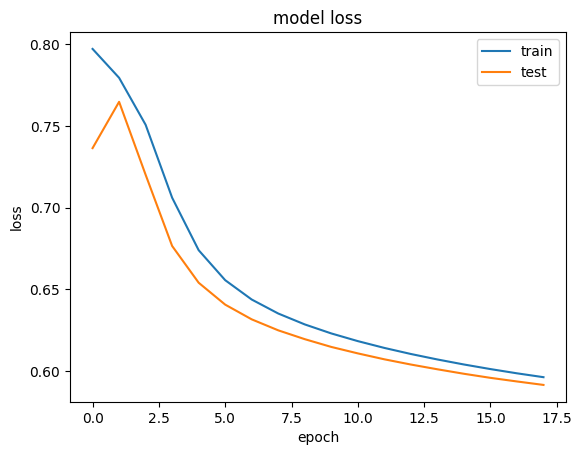

In [50]:
#Training results
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper right")
plt.show()

Extracting weights from model

In [51]:
def extract_weights(name, model):
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    weights = weights / np.linalg.norm(weights, axis = 1).reshape((-1, 1))
    return weights

anime_weights = extract_weights('anime_embedding', model)
user_weights = extract_weights('user_embedding', model)

anime meta data

In [52]:
df = pd.read_csv(INPUT_DIR + '/anime.csv', low_memory=True)
df = df.replace("Unknown", np.nan)

In [53]:
# Fixing Names
def getAnimeName(anime_id):
    try:
        name = df[df.anime_id == anime_id].eng_version.values[0]
        if name is np.nan:
            name = df[df.anime_id == anime_id].Name.values[0]
    except:
        print('error')
    
    return name

df['anime_id'] = df['MAL_ID']
df["eng_version"] = df['English name']
df['eng_version'] = df.anime_id.apply(lambda x: getAnimeName(x))

df.sort_values(by=['Score'], 
               inplace=True,
               ascending=False, 
               kind='quicksort',
               na_position='last')

df = df[["anime_id", "eng_version", 
         "Score", "Genres", "Episodes", 
         "Type", "Premiered", "Members"]]

In [54]:
def getAnimeFrame(anime):
    if isinstance(anime, int):
        return df[df.anime_id == anime]
    if isinstance(anime, str):
        return df[df.eng_version == anime]

sypnopsis data

In [55]:
cols = ["MAL_ID", "Name", "Genres", "sypnopsis"]
sypnopsis_df = pd.read_csv(INPUT_DIR + '/anime_with_synopsis.csv', usecols=cols)

def getSypnopsis(anime):
    if isinstance(anime, int):
        return sypnopsis_df[sypnopsis_df.MAL_ID == anime].sypnopsis.values[0]
    if isinstance(anime, str):
        return sypnopsis_df[sypnopsis_df.Name == anime].sypnopsis.values[0]

**Finding Similar Animes (Item Based Recommendation)**

In [56]:
#pd.reset_option('all')
pd.set_option("max_colwidth", None)

def find_similar_animes(name, n=10, return_dist=False, neg=False):
    try:
        index = getAnimeFrame(name).anime_id.values[0]
        encoded_index = anime2anime_encoded.get(index)
        weights = anime_weights
        
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        
        n = n + 1            
        
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('animes closest to {}'.format(name))

        if return_dist:
            return dists, closest
        
        rindex = df

        SimilarityArr = []

        for close in closest:
            decoded_id = anime_encoded2anime.get(close)
            sypnopsis = getSypnopsis(decoded_id)
            anime_frame = getAnimeFrame(decoded_id)
            
            anime_name = anime_frame.eng_version.values[0]
            genre = anime_frame.Genres.values[0]
            similarity = dists[close]
            SimilarityArr.append({"anime_id": decoded_id, "name": anime_name,
                                  "similarity": similarity,"genre": genre,
                                  'sypnopsis': sypnopsis})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame[Frame.anime_id != index].drop(['anime_id'], axis=1)

    except:
        print('{}!, Not Found in Anime list'.format(name))

In [57]:
find_similar_animes('Dragon Ball', n=10, neg=False)

animes closest to Dragon Ball


,name,similarity,genre,sypnopsis
9,Dragon Ball Z,0.885399,"Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power","Five years after winning the World Martial Arts tournament, Gokuu is now living a peaceful life with his wife and son. This changes, however, with the arrival of a mysterious enemy named Raditz who presents himself as Gokuu's long-lost brother. He reveals that Gokuu is a warrior from the once powerful but now virtually extinct Saiyan race, whose homeworld was completely annihilated. When he was sent to Earth as a baby, Gokuu's sole purpose was to conquer and destroy the planet; but after suffering amnesia from a head injury, his violent and savage nature changed, and instead was raised as a kind and well-mannered boy, now fighting to protect others. With his failed attempt at forcibly recruiting Gokuu as an ally, Raditz warns Gokuu's friends of a new threat that's rapidly approaching Earth—one that could plunge Earth into an intergalactic conflict and cause the heavens themselves to shake. A war will be fought over the seven mystical dragon balls, and only the strongest will survive in Dragon Ball Z ."
8,Rurouni Kenshin,0.787129,"Action, Adventure, Comedy, Historical, Romance, Samurai, Shounen","In the final years of the Bakumatsu era lived a legendary assassin known as Hitokiri Battousai. Feared as a merciless killer, he was unmatched throughout the country, but mysteriously disappeared at the peak of the Japanese Revolution. It has been ten peaceful years since then, but the very mention of Battousai still strikes terror into the hearts of war veterans. Unbeknownst to them, Battousai has abandoned his bloodstained lifestyle in an effort to repent for his sins, now living as Kenshin Himura, a wandering swordsman with a cheerful attitude and a strong will. Vowing never to kill again, Kenshin dedicates himself to protecting the weak. One day, he stumbles across Kaoru Kamiya at her kendo dojo, which is being threatened by an impostor claiming to be Battousai. After receiving help from Kenshin, Kaoru allows him to stay at the dojo, and so the former assassin temporarily ceases his travels. Rurouni Kenshin: Meiji Kenkaku Romantan tells the story of Kenshin as he strives to save those in need of saving. However, as enemies from both past and present begin to emerge, will the reformed killer be able to uphold his new ideals?"
7,One Piece Film Z,0.768603,"Action, Adventure, Comedy, Drama, Fantasy, Shounen","The Straw Hat Pirates enter the rough seas of the New World in search of the hidden treasures of the Pirate King, Gol D. Roger－One Piece. On their voyage, the pirates come across a terrifying, powerful man, former Marine Admiral Z. Z is accused of having stolen the ""Dyna Stones"", weapons believed to have the power to shake up the New World. The Marine Headquarters believes Z is about to use it to end the pirate era, and with it, the lives of many innocent people. In fear of such a phenomenal event, marines start to take action against the former admiral. Even if it means stumbling upon marines and the navy, the Straw Hat Pirates decided to chase after Z and stop him from causing havoc. As they continue to embark on their ventures, the pirates bump into new and familiar acquaintances."
6,Hunter x Hunter,0.767178,"Action, Adventure, Super Power, Fantasy, Shounen","Hunters are specialized in a wide variety of fields, ranging from treasure hunting to cooking. They have access to otherwise unavailable funds and information that allow them to pursue their dreams and interests. However, being a hunter is a special privilege, only attained by taking a deadly exam with an extremely low success rate. Gon Freecss, a 12-year-old boy with the hope of finding his missing father, sets out on a quest to take the Hunter Exam. Along the way, he picks up three companions who also aim to take the dangerous test: the revenge-seeking Kurapika, aspiring doctor Leorio Paladiknight, and a mischievous child the same age as G

In [ ]:
find_similar_animes('Your Name.', n=5, neg=False)

In [ ]:
find_similar_animes('Sword Art Online', n=5, neg=False)

In [ ]:
find_similar_animes('Black Clover', n=5, neg=False)

In [ ]:
find_similar_animes('Death Note', n=5, neg=False)

In [ ]:
model.save('anime_model.h5')

from IPython.display import FileLink
FileLink(r'./anime_model.h5')

## **Content based filtering**

In [6]:
dfAnime = pd.read_csv('/kaggle/input/anime-recommendation-database-2020/anime.csv')

In [7]:
dfAnime.drop(dfAnime[dfAnime['Score'] == 'Unknown'].index, inplace=True)

In [8]:
dfAnime.drop(dfAnime[dfAnime['Rating'] == 'Unknown'].index, inplace=True)

In [9]:
dfAnime[dfAnime['Name'].duplicated(keep=False) == True]

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
12826,35102,Hinamatsuri,6.79,"Historical, Kids",Unknown,ひなまつり,OVA,1,Unknown,Unknown,...,22.0,18.0,38.0,58.0,21.0,12.0,6.0,4.0,1.0,5.0
13540,36296,Hinamatsuri,8.21,"Comedy, Sci-Fi, Seinen, Slice of Life, Superna...",Hinamatsuri,ヒナまつり,TV,12,"Apr 6, 2018 to Jun 22, 2018",Spring 2018,...,21484.0,49894.0,63480.0,29442.0,8408.0,2895.0,813.0,267.0,124.0,168.0


In [10]:
dfAnime.drop(12826, inplace=True)
dfAnime[dfAnime['Name'].duplicated(keep=False) == True]

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1


In [11]:
anime = dfAnime[['Name','English name','Genres','Type','Rating','Score','Popularity']]


In [12]:
anime.loc[:, 'Genres'] = anime['Genres'].apply(lambda x: x.split(', '))


In [13]:
anime.loc[:, 'Genres'] = anime['Genres'].apply(lambda x: [genre.replace(' ', '-') for genre in x])


In [14]:
anime.loc[:, 'Genres'] = anime['Genres'].apply(lambda x: ' '.join(x))


In [15]:
anime.loc[:, 'Rating'] = anime['Rating'].apply(lambda x: x.replace(' ',''))


In [17]:
anime['Score'] = anime['Score'].astype(float)
anime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12309 entries, 0 to 17552
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          12309 non-null  object 
 1   English name  12309 non-null  object 
 2   Genres        12309 non-null  object 
 3   Type          12309 non-null  object 
 4   Rating        12309 non-null  object 
 5   Score         12309 non-null  float64
 6   Popularity    12309 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 769.3+ KB


/tmp/ipykernel_15/3886926673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime['Score'] = anime['Score'].astype(float)


In [18]:
anime.describe()

,Score,Popularity
count,12309.000000,12309.000000
mean,6.512471,6434.111057
std,0.887501,3848.251051
min,1.850000,1.000000
25%,5.930000,3129.000000
50%,6.520000,6325.000000
75%,7.140000,9565.000000
max,9.190000,15374.000000


In [19]:
minVal = anime['Popularity'].min()
maxVal = anime['Popularity'].max()

anime['PopularityScaled'] = 10 - ((anime['Popularity'] - minVal) / (maxVal - minVal)) * 10
anime

/tmp/ipykernel_15/3839926378.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime['PopularityScaled'] = 10 - ((anime['Popularity'] - minVal) / (maxVal - minVal)) * 10


,Name,English name,Genres,Type,Rating,Score,Popularity,PopularityScaled
0,Cowboy Bebop,Cowboy Bebop,Action Adventure Comedy Drama Sci-Fi Space,TV,R-17+(violence&profanity),8.78,39,9.975281
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop:The Movie,Action Drama Mystery Sci-Fi Space,Movie,R-17+(violence&profanity),8.39,518,9.663696
2,Trigun,Trigun,Action Sci-Fi Adventure Comedy Drama Shounen,TV,PG-13-Teens13orolder,8.24,201,9.869902
3,Witch Hunter Robin,Witch Hunter Robin,Action Mystery Police Supernatural Drama Magic,TV,PG-13-Teens13orolder,7.27,1467,9.046380
4,Bouken Ou Beet,Beet the Vandel Buster,Adventure Fantasy Shounen Supernatural,TV,PG-Children,6.98,4369,7.158655
...,...,...,...,...,...,...,...,...
17504,Kimetsu Gakuen: Valentine-hen,Unknown,Comedy,ONA,PG-13-Teens13orolder,6.59,3814,7.519677
17505,Heikousen,Unknown,Music Romance,Music,G-AllAges,7.52,10869,2.930462
17512,Nu Wushen de Canzhuo Spring Festival Special,Cooking with Valkyries Spring Festival Special,Slice-of-Life Comedy,Special,PG-Children,6.83,11973,2.212320
17513,Yakusoku no Neverland 2nd Season: Michishirube,The Promised Neverland Season 2 Episode 5.5,Mystery Psychological Supernatural Thriller Sh...,Special,R-17+(violence&profanity),4.81,4398,7.139791


In [20]:
anime['ScorePop'] = (anime['Score'] + anime['PopularityScaled']) / 2


/tmp/ipykernel_15/1077896812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime['ScorePop'] = (anime['Score'] + anime['PopularityScaled']) / 2


In [21]:
anime.reset_index(drop=True,inplace=True)
anime

,Name,English name,Genres,Type,Rating,Score,Popularity,PopularityScaled,ScorePop
0,Cowboy Bebop,Cowboy Bebop,Action Adventure Comedy Drama Sci-Fi Space,TV,R-17+(violence&profanity),8.78,39,9.975281,9.377641
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop:The Movie,Action Drama Mystery Sci-Fi Space,Movie,R-17+(violence&profanity),8.39,518,9.663696,9.026848
2,Trigun,Trigun,Action Sci-Fi Adventure Comedy Drama Shounen,TV,PG-13-Teens13orolder,8.24,201,9.869902,9.054951
3,Witch Hunter Robin,Witch Hunter Robin,Action Mystery Police Supernatural Drama Magic,TV,PG-13-Teens13orolder,7.27,1467,9.046380,8.158190
4,Bouken Ou Beet,Beet the Vandel Buster,Adventure Fantasy Shounen Supernatural,TV,PG-Children,6.98,4369,7.158655,7.069327
...,...,...,...,...,...,...,...,...,...
12304,Kimetsu Gakuen: Valentine-hen,Unknown,Comedy,ONA,PG-13-Teens13orolder,6.59,3814,7.519677,7.054839
12305,Heikousen,Unknown,Music Romance,Music,G-AllAges,7.52,10869,2.930462,5.225231
12306,Nu Wushen de Canzhuo Spring Festival Special,Cooking with Valkyries Spring Festival Special,Slice-of-Life Comedy,Special,PG-Children,6.83,11973,2.212320,4.521160
12307,Yakusoku no Neverland 2nd Season: Michishirube,The Promised Neverland Season 2 Episode 5.5,Mystery Psychological Supernatural Thriller Sh...,Special,R-17+(violence&profanity),4.81,4398,7.139791,5.974895


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
# Tf Idf Vectorizer

vect = TfidfVectorizer()
genresAnime = vect.fit_transform(anime['Genres'])
genresAnimeDf = pd.DataFrame(
    genresAnime.toarray(),
    columns=vect.get_feature_names_out()
)

genresAnimeDf

,action,adventure,ai,arts,cars,comedy,dementia,demons,drama,ecchi,...,slice,space,sports,super,supernatural,thriller,unknown,vampire,yaoi,yuri
0,0.303014,0.350930,0.0,0.0,0.0,0.261086,0.0,0.0,0.365243,0.0,...,0.000000,0.573598,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
1,0.292155,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.352154,0.0,...,0.000000,0.553042,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
2,0.336226,0.389394,0.0,0.0,0.0,0.289702,0.0,0.0,0.405276,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
3,0.262525,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.316439,0.0,...,0.000000,0.000000,0.000000,0.0,0.368047,0.00000,0.0,0.0,0.0,0.0
4,0.000000,0.468110,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.566659,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12304,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
12305,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
12306,0.000000,0.000000,0.0,0.0,0.0,0.339504,0.0,0.0,0.000000,0.0,...,0.543058,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
12307,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.345934,0.60358,0.0,0.0,0.0,0.0


In [24]:
# Weighting the Genres
genresAnimeDf3 = genresAnimeDf.multiply(3)
genresAnimeDf3

,action,adventure,ai,arts,cars,comedy,dementia,demons,drama,ecchi,...,slice,space,sports,super,supernatural,thriller,unknown,vampire,yaoi,yuri
0,0.909042,1.052790,0.0,0.0,0.0,0.783258,0.0,0.0,1.095730,0.0,...,0.000000,1.720795,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.876465,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.056462,0.0,...,0.000000,1.659127,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,1.008678,1.168181,0.0,0.0,0.0,0.869107,0.0,0.0,1.215827,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.787576,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.949318,0.0,...,0.000000,0.000000,0.000000,0.0,1.104140,0.000000,0.0,0.0,0.0,0.0
4,0.000000,1.404330,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,1.699977,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12304,0.000000,0.000000,0.0,0.0,0.0,3.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
12305,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
12306,0.000000,0.000000,0.0,0.0,0.0,1.018512,0.0,0.0,0.000000,0.0,...,1.629175,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
12307,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,1.037801,1.810739,0.0,0.0,0.0,0.0


In [25]:
vect = TfidfVectorizer()
typeAnime = vect.fit_transform(anime['Type'])
typeAnimeDf = pd.DataFrame(
    typeAnime.toarray(),
    columns=vect.get_feature_names_out()
)

typeAnimeDf

,movie,music,ona,ova,special,tv
0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
12304,0.0,0.0,1.0,0.0,0.0,0.0
12305,0.0,1.0,0.0,0.0,0.0,0.0
12306,0.0,0.0,0.0,0.0,1.0,0.0
12307,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
# Weighting the Type
typeAnimeDf2 = typeAnimeDf.multiply(2)
typeAnimeDf2

,movie,music,ona,ova,special,tv
0,0.0,0.0,0.0,0.0,0.0,2.0
1,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...
12304,0.0,0.0,2.0,0.0,0.0,0.0
12305,0.0,2.0,0.0,0.0,0.0,0.0
12306,0.0,0.0,0.0,0.0,2.0,0.0
12307,0.0,0.0,0.0,0.0,2.0,0.0


In [27]:
vect = TfidfVectorizer()
ratingAnime = vect.fit_transform(anime['Rating'])
ratingAnimeDf = pd.DataFrame(
    ratingAnime.toarray(),
    columns=vect.get_feature_names_out()
)

ratingAnimeDf

,13,17,allages,children,hentai,mildnudity,pg,profanity,rx,teens13orolder,violence
0,0.000000,0.57735,0.0,0.00000,0.0,0.0,0.000000,0.57735,0.0,0.000000,0.57735
1,0.000000,0.57735,0.0,0.00000,0.0,0.0,0.000000,0.57735,0.0,0.000000,0.57735
2,0.592957,0.00000,0.0,0.00000,0.0,0.0,0.544797,0.00000,0.0,0.592957,0.00000
3,0.592957,0.00000,0.0,0.00000,0.0,0.0,0.544797,0.00000,0.0,0.592957,0.00000
4,0.000000,0.00000,0.0,0.90983,0.0,0.0,0.414980,0.00000,0.0,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
12304,0.592957,0.00000,0.0,0.00000,0.0,0.0,0.544797,0.00000,0.0,0.592957,0.00000
12305,0.000000,0.00000,1.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.00000
12306,0.000000,0.00000,0.0,0.90983,0.0,0.0,0.414980,0.00000,0.0,0.000000,0.00000
12307,0.000000,0.57735,0.0,0.00000,0.0,0.0,0.000000,0.57735,0.0,0.000000,0.57735


In [28]:
animeTFIDF = pd.concat([genresAnimeDf3, typeAnimeDf2, ratingAnimeDf], axis=1)
animeTFIDF

,action,adventure,ai,arts,cars,comedy,dementia,demons,drama,ecchi,...,17,allages,children,hentai,mildnudity,pg,profanity,rx,teens13orolder,violence
0,0.909042,1.052790,0.0,0.0,0.0,0.783258,0.0,0.0,1.095730,0.0,...,0.57735,0.0,0.00000,0.0,0.0,0.000000,0.57735,0.0,0.000000,0.57735
1,0.876465,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.056462,0.0,...,0.57735,0.0,0.00000,0.0,0.0,0.000000,0.57735,0.0,0.000000,0.57735
2,1.008678,1.168181,0.0,0.0,0.0,0.869107,0.0,0.0,1.215827,0.0,...,0.00000,0.0,0.00000,0.0,0.0,0.544797,0.00000,0.0,0.592957,0.00000
3,0.787576,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.949318,0.0,...,0.00000,0.0,0.00000,0.0,0.0,0.544797,0.00000,0.0,0.592957,0.00000
4,0.000000,1.404330,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.00000,0.0,0.90983,0.0,0.0,0.414980,0.00000,0.0,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12304,0.000000,0.000000,0.0,0.0,0.0,3.000000,0.0,0.0,0.000000,0.0,...,0.00000,0.0,0.00000,0.0,0.0,0.544797,0.00000,0.0,0.592957,0.00000
12305,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.00000,1.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.00000
12306,0.000000,0.000000,0.0,0.0,0.0,1.018512,0.0,0.0,0.000000,0.0,...,0.00000,0.0,0.90983,0.0,0.0,0.414980,0.00000,0.0,0.000000,0.00000
12307,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.57735,0.0,0.00000,0.0,0.0,0.000000,0.57735,0.0,0.000000,0.57735


In [29]:
animeTFIDFscorePop = animeTFIDF.mul(anime['ScorePop'], axis=0)
animeTFIDFscorePop

,action,adventure,ai,arts,cars,comedy,dementia,demons,drama,ecchi,...,17,allages,children,hentai,mildnudity,pg,profanity,rx,teens13orolder,violence
0,8.524670,9.872684,0.0,0.0,0.0,7.345112,0.0,0.0,10.275360,0.0,...,5.414183,0.000000,0.000000,0.0,0.0,0.000000,5.414183,0.0,0.000000,5.414183
1,7.911715,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,9.536524,0.0,...,5.211653,0.000000,0.000000,0.0,0.0,0.000000,5.211653,0.0,0.000000,5.211653
2,9.133527,10.577820,0.0,0.0,0.0,7.869721,0.0,0.0,11.009256,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,4.933109,0.000000,0.0,5.369198,0.000000
3,6.425194,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,7.744720,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,4.444556,0.000000,0.0,4.837457,0.000000
4,0.000000,9.927667,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,6.431889,0.0,0.0,2.933631,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12304,0.000000,0.000000,0.0,0.0,0.0,21.164516,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,3.843454,0.000000,0.0,4.183217,0.000000
12305,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,5.225231,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
12306,0.000000,0.000000,0.0,0.0,0.0,4.604858,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,4.113489,0.0,0.0,1.876192,0.000000,0.0,0.000000,0.000000
12307,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,3.449607,0.000000,0.000000,0.0,0.0,0.000000,3.449607,0.0,0.000000,3.449607


In [30]:
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
cosSin = cosine_similarity(animeTFIDFscorePop)
cosSinDF = pd.DataFrame(cosSin)
cosSinDF

,0,1,2,3,4,5,6,7,8,9,...,12299,12300,12301,12302,12303,12304,12305,12306,12307,12308
0,1.000000,0.572665,0.764340,0.411153,0.391319,0.419351,0.392709,0.329025,0.407034,0.341701,...,0.000000,0.372404,0.285714,0.000000,0.201465,0.167841,0.0,0.056983,0.071429,0.073111
1,0.572665,1.000000,0.329893,0.264342,0.000000,0.073948,0.068274,0.000000,0.116972,0.162034,...,0.000000,0.000000,0.000000,0.285714,0.194245,0.000000,0.0,0.000000,0.206211,0.000000
2,0.764340,0.329893,1.000000,0.496330,0.553409,0.636315,0.475864,0.504760,0.491760,0.347837,...,0.269591,0.453335,0.357143,0.016149,0.239695,0.257666,0.0,0.079377,0.082028,0.152553
3,0.411153,0.264342,0.496330,1.000000,0.435935,0.423591,0.418492,0.357143,0.462252,0.590426,...,0.071429,0.357143,0.357143,0.016149,0.016149,0.071429,0.0,0.016149,0.202962,0.071429
4,0.391319,0.000000,0.553409,0.435935,1.000000,0.459210,0.301863,0.421548,0.301863,0.285714,...,0.452047,0.301863,0.301863,0.364971,0.071429,0.016149,0.0,0.071429,0.224627,0.016149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12304,0.167841,0.000000,0.257666,0.071429,0.016149,0.289518,0.210015,0.237316,0.071429,0.000000,...,0.071429,0.403465,0.071429,0.016149,0.016149,1.000000,0.0,0.234401,0.000000,0.351456
12305,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.137312,0.000000,0.000000,0.000000,...,0.000000,0.410030,0.000000,0.000000,0.540993,0.000000,1.0,0.000000,0.000000,0.000000
12306,0.056983,0.000000,0.079377,0.016149,0.071429,0.090191,0.424352,0.504766,0.016149,0.000000,...,0.301863,0.128876,0.500848,0.071429,0.071429,0.234401,0.0,1.000000,0.285714,0.396933
12307,0.071429,0.206211,0.082028,0.202962,0.224627,0.096057,0.000000,0.073065,0.000000,0.405435,...,0.431143,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.285714,1.000000,0.285714


In [32]:
def recomendation(title) :
    idxAnime = anime[anime['Name'] == title].index.values[0]
    similarAnime = list(enumerate(cosSin[idxAnime]))
    sortedAnime = sorted(similarAnime, key=lambda x : x[1], reverse=True)
    fil = []
    for i in range (1,11) :
        fil.append(sortedAnime[i][0])
    return anime.iloc[fil]

In [33]:
recomendation('Dragon Ball')

,Name,English name,Genres,Type,Rating,Score,Popularity,PopularityScaled,ScorePop
733,Dragon Ball Z,Dragon Ball Z,Action Adventure Comedy Fantasy Martial-Arts S...,TV,PG-13-Teens13orolder,8.16,88,9.943407,9.051704
8684,Dragon Ball Super,Dragon Ball Super,Action Adventure Comedy Super-Power Martial-Ar...,TV,PG-13-Teens13orolder,7.42,212,9.862746,8.641373
7611,Dragon Ball Kai (2014),Dragon Ball Z Kai:The Final Chapters,Action Adventure Comedy Super-Power Martial-Ar...,TV,PG-13-Teens13orolder,7.69,1164,9.243479,8.466739
4306,Dragon Ball Kai,Dragon Ball Z Kai,Action Adventure Comedy Fantasy Martial-Arts S...,TV,PG-13-Teens13orolder,7.73,536,9.651987,8.690994
1569,Naruto: Shippuuden,Naruto:Shippuden,Action Adventure Comedy Super-Power Martial-Ar...,TV,PG-13-Teens13orolder,8.16,18,9.988942,9.074471
10,Naruto,Naruto,Action Adventure Comedy Super-Power Martial-Ar...,TV,PG-13-Teens13orolder,7.91,8,9.995447,8.952723
214,Rekka no Honoo,Flame of Recca,Action Adventure Martial-Arts Shounen Super-Power,TV,PG-13-Teens13orolder,7.36,2139,8.609250,7.984625
9950,Boruto: Naruto Next Generations,Boruto:Naruto Next Generations,Action Adventure Super-Power Martial-Arts Shounen,TV,PG-13-Teens13orolder,5.81,223,9.855591,7.832795
631,Shadow Skill: Eigi,Unknown,Adventure Fantasy Magic Martial-Arts Super-Pow...,TV,PG-13-Teens13orolder,7.12,4626,6.991479,7.055739
4656,Wolverine,Wolverine,Action Martial-Arts Super-Power,TV,PG-13-Teens13orolder,6.10,3501,7.723281,6.911641
